## Exploración de datos

Se presenta un análisis exploratorio del dataset de juegos de *HowLongToBeat*, centrado en entender las relaciones entre reseñas, tiempo de juego y variables complementarias. El dataset contiene 108 columnas con métricas de participación de usuarios, tiempos de completado, reseñas, plataformas y metadatos de juegos.

### Principales características del dataset

Se analizaron las principales características del dataset original, con los siguientes resultados:

| Métrica                                               | Valor     |
|-------------------------------------------------------|-----------|
| Total de juegos                                       | 147.474   |
| Juegos sin reviews                                    | 89.939    |
| Promedio de `game_review_score` (con reviews)         | 61.74     |
| Promedio de duración principal (`game_comp_main_avg`) | 2.45 horas |
| Promedio de duración entre modos de juego (`game_comp_all_avg`)          |5.23 horas|

### Estadísticas descriptivas relevantes

Se seleccionaron siete atributos relevantes basados en su potencial explicativo y cobertura de diferentes aspectos del dataset: calidad percibida, interacción de los usuarios, y duración del juego en horas.

| Variable               | Media  | Mediana | Desvío estándar | Mínimo | Máximo     |
| ---------------------- | ------ | ------- | --------------- | ------ | ---------- |
| `game_review_score`    | 24.26  | 0.0     | 32.38           | 0.0    | 100.00     |
| `review_review_count`  | 15.81  | 0.0     | 138.90          | 0.0    | 7439.00    |
| `game_count_replay`    | 1.86   | 0.0     | 22.34           | 0.0    | 2165.00    |
| `game_count_retired`   | 10.49  | 0.0     | 76.40           | 0.0    | 5227.00    |
| `game_count_comp`      | 49.52  | 1.0     | 476.26          | 0.0    | 36371.00   |
| `game_comp_all_avg`    | 5.23 h | 0.0 h   | 58.81 h         | 0.0 h  | 8105.08 h  |
| `game_invested_mp_avg` | 1.51 h | 0.0 h   | 51.77 h         | 0.0 h  | 10000.00 h |

De la tabla se puede ver la siguiente información:

- La mayoría de los juegos tienen un puntaje de reseña bajo o nulo (game_review_score y review_review_count con mediana = 0), lo que sugiere una alta cantidad de juegos poco evaluados por la comunidad.

- El promedio de game_count_comp es relativamente alto comparado con su mediana, lo que indica una distribución fuertemente sesgada: pocos juegos muy populares concentran la mayoría de las finalizaciones.

- Las métricas de tiempo (game_comp_all_avg y game_invested_mp_avg) presentan desviaciones estándar elevadas y valores máximos extremos, lo que indica gran variabilidad en duración de juegos, desde experiencias muy breves hasta compromisos prolongados.

- La baja mediana en casi todas las variables sugiere que la mayoría de los juegos tienen poca interacción o visibilidad, y solo un subconjunto reducido concentra el interés de los usuarios.

Este análisis justifica la necesidad de filtrar y escalar las métricas en etapas posteriores del procesamiento, especialmente para tareas de modelado o visualización.

### Análisis de atributos relacionados con "review"

Los atributos asociados a las reseñas de usuarios constituyen variables clave en este conjunto de datos. Estos campos, identificables por la raíz léxica "review", cuantifican tanto el volumen como la valoración de las evaluaciones recibidas por cada juego. El campo game_review_score representa el puntaje promedio de reseñas que tiene un juego, con valores que oscilan entre 0 y 100.

Adicionalmente, existen atributos con el formato review_X, donde X es un múltiplo de 5 entre 5 y 100 (por ejemplo, review_5, review_10, ..., review_100). Cada uno de estos atributos indica la cantidad de reseñas que otorgaron exactamente ese puntaje al juego. El campo review_review_count representa el número total de reseñas recibidas por el juego.

A continuación, se presenta una tabla que agrupa los juegos según intervalos de puntaje promedio (game_review_score) y muestra la cantidad de juegos que caen en cada intervalo. Además, se incluye la cantidad total de juegos que no han recibido ninguna reseña.

| #  | Intervalo de Puntaje | Cantidad de Juegos |
|----|----------------------|---------------------|
| 0  | 0-10                 | 90327               |
| 1  | 10-20                | 1117                |
| 2  | 20-30                | 1725                |
| 3  | 30-40                | 2385                |
| 4  | 40-50                | 4470                |
| 5  | 50-60                | 8526                |
| 6  | 60-70                | 14750               |
| 7  | 70-80                | 15085               |
| 8  | 80-90                | 6709                |
| 9  | 90-100               | 1547                |

Tambien se puede apreciar la siguiente distribución de los puntajes.

| Intervalo       | % Juegos | Interpretación               |
|-----------------|----------|------------------------------|
| 0 (Sin reseñas) | 61.17%    | Posible ruido para análisis  |
| 0-50            | 6.66%    | Recepción negativa           |
| 50-80           | 26.01%    | Recepción moderada           |
| 80-100          | 6.16%    | Excelente recepción          |

Se observa que existe una gran cantidad de juegos no han recibido ninguna review. Incluir estos juegos en el dataset puede resultar problemático si se desea realizar análisis que relacionen el puntaje promedio de reviews con otros atributos. Esto se debe a que, al no tener ninguna reseña, su puntaje promedio se representa como 0, lo cual no refleja una calificación real y puede introducir ruido o sesgos en el análisis. Por lo tanto, puede ser recomendable excluir estos registros en estudios donde las reviews son una variable clave. A continuación se puede apreciar la diferencia entre tener o no los juegos sin reviews.


![juegos_vs_juegos_con_review](img/juegos_vs_juegos_con_review.png)

Otro aspecto relevante del análisis es la relación entre la duración promedio de los juegos y su puntaje de reseñas. Para estudiar esta relación, se agruparon los juegos según su duración promedio (`game_comp_all_avg`), excluyendo aquellos que no cuentan con reseñas válidas. Esta decisión se justifica en que los juegos sin reseñas presentan un puntaje promedio de `0`, lo que no representa una calificación real y puede distorsionar los resultados.

La siguiente tabla muestra la distribución de juegos por intervalo de duración:


#### Cantidad de juegos por intervalo de duración (en horas)

| Intervalo de Duración | Cantidad de Juegos |
|------------------------|--------------------|
| 0-50 hrs               | 55,002             |
| 50-100 hrs             | 1,488              |
| 100-200 hrs            | 462                |
| 200-500 hrs            | 192                |
| 500-1000 hrs           | 67                 |
| >1000 hrs              | 54                 |


Como se observa, la gran mayoría de los juegos se concentran en el primer intervalo (menos de 50 horas), lo cual sugiere que el análisis visual con todos los datos puede estar fuertemente sesgado por outliers con duraciones extremadamente altas.

La siguiente visualización muestra dos gráficos de dispersión que relacionan la duración promedio de juego con su puntuación promedio de reseñas:

- El primero incluye todos los juegos válidos (sin reviews nulas),
- El segundo muestra el 95% inferior de los datos, eliminando outliers extremos.

![puntuacion_vs_duracion_outlier](img/puntuacion_vs_duracion_outlier.png)



Como puede apreciarse, al eliminar los valores atípicos (gráfico derecho), los puntos se agrupan de forma más compacta y se vuelve más evidente la estructura de los datos. Esta limpieza permite observar mejor la densidad y distribución de los juegos según su duración, revelando posibles patrones en su relación con la puntuación.

En particular, se nota que los juegos más extensos dentro del rango no atípico (hasta aproximadamente 100 horas) tienden a concentrarse en un rango de puntuaciones relativamente alto, aunque no necesariamente máximo. Esta observación sugiere una posible correlación entre mayor tiempo de juego y recepción más favorable por parte de los usuarios, aunque dicha correlación no es estrictamente lineal ni concluyente a simple vista.

Cabe destacar que en el gráfico sin outliers también se percibe una mayor variedad de puntuaciones en juegos de duración media (20–60 horas), lo que podría estar asociado a una mayor diversidad de géneros o experiencias ofrecidas en ese rango.

### Reducción de dimensiones

El conjunto de datos original contenía una gran cantidad de columnas, muchas de las cuales resultaban redundantes, irrelevantes o difíciles de interpretar. Con el objetivo de simplificar el análisis y mejorar la eficiencia de los modelos posteriores, se aplicó un proceso de reducción de dimensionalidad. Este proceso consistió en descartar o agrupar columnas según su utilidad y significado. Las decisiones principales fueron las siguientes:

- **Eliminación de columnas con significado desconocido:**
  Al haber sido recolectado mediante scraping, el dataset incluía 15 columnas cuyo propósito no pudo ser identificado. Estas columnas carecían de nombre descriptivo, contexto o documentación, lo que impedía su correcta interpretación y análisis. Por esta razón, se descartaron completamente.

- **Eliminación de columnas con información no procesable:**
  Se identificaron 6 columnas que contenían enlaces a imágenes, perfiles de usuario, páginas externas o texto libre sin una estructura estandarizada (como descripciones o títulos alternativos). Debido a que esta información no era útil en el contexto del análisis cuantitativo, también se eliminaron.

- **Agrupación de columnas de distribución de puntuaciones:**
  El dataset contenía 20 columnas del tipo `review_X`, donde `X` representa distintos umbrales de puntuación (5, 10, 15, ..., 100). Estas columnas representaban la cantidad de reseñas que asignaron una puntuación dentro de un cierto rango. Para reducir la dimensionalidad sin perder información significativa, se agruparon en cinco intervalos más amplios:

  - `review_20`: puntuaciones entre 1 y 20
  - `review_40`: puntuaciones entre 21 y 40
  - `review_60`: puntuaciones entre 41 y 60
  - `review_80`: puntuaciones entre 61 y 80
  - `review_100`: puntuaciones entre 81 y 100

  Esta transformación redujo las 20 columnas originales a solo 5, manteniendo la esencia de la distribución de puntuaciones y facilitando tanto la visualización como el procesamiento estadístico posterior.

En conjunto, estas acciones permitieron depurar significativamente el conjunto de datos, enfocando el análisis en variables relevantes y mejorando la interpretabilidad sin comprometer la calidad de la información.


# ANEXO

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

csv_path = '../hltb_data.csv'

# Cargar el dataset
df = pd.read_csv(csv_path, low_memory=False)

# Filtrar las filas que tengan un puntaje de review válido (eliminar NaN)
df_filtered = df[['game_game_name', 'game_review_score']].copy()

# Crear los intervalos de puntajes (0-10, 10-20, ..., 90-100)
bins = list(range(0, 110, 10))
labels = [f'{i}-{i+10}' for i in range(0, 100, 10)]

# Asignar los juegos a los intervalos
df_filtered['review_interval'] = pd.cut(df_filtered['game_review_score'], bins=bins, labels=labels, right=False)

# Contar cuántos juegos caen en cada intervalo
review_count_by_interval = df_filtered['review_interval'].value_counts().sort_index()

# Contar la cantidad de juegos con 0 reviews
cero_reviews_count = df[df['game_count_review'] == 0].shape[0]

# Crear la tabla
table = pd.DataFrame({
    'Intervalo de Puntaje': review_count_by_interval.index,
    'Cantidad de Juegos': review_count_by_interval.values
})

# Mostrar la tabla
print(table)


print(f"\nCantidad de juegos sin review: {cero_reviews_count}")


  Intervalo de Puntaje  Cantidad de Juegos
0                 0-10               90327
1                10-20                1117
2                20-30                1725
3                30-40                2385
4                40-50                4470
5                50-60                8526
6                60-70               14750
7                70-80               15085
8                80-90                6709
9               90-100                1547

Cantidad de juegos sin review: 90209


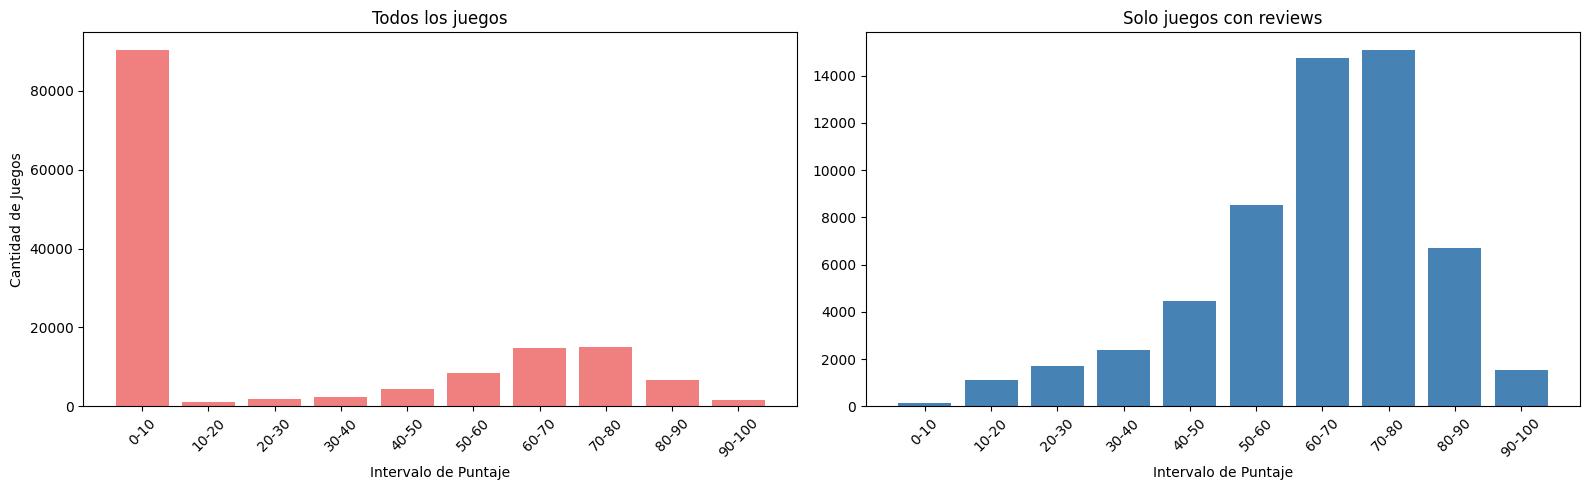

In [15]:
# Crear intervalos de 10 en 10 de 0 a 100
bins = list(range(0, 110, 10))
labels = [f'{i}-{i+10}' for i in range(0, 100, 10)]

# Filtrar columnas necesarias
df_filtered_all = df[['game_game_name', 'game_review_score', 'game_count_review']].copy()

# Tabla con todos los juegos (incluyendo los sin reviews)
df_filtered_all['review_interval'] = pd.cut(df_filtered_all['game_review_score'], bins=bins, labels=labels, right=False)
review_counts_all = df_filtered_all['review_interval'].value_counts().sort_index()

# Tabla sin juegos que no tienen reviews
df_filtered_with_reviews = df_filtered_all[df_filtered_all['game_count_review'] > 0].copy()
df_filtered_with_reviews['review_interval'] = pd.cut(df_filtered_with_reviews['game_review_score'], bins=bins, labels=labels, right=False)
review_counts_filtered = df_filtered_with_reviews['review_interval'].value_counts().sort_index()

# Crear la figura con tamaños personalizados para los gráficos
fig = plt.figure(figsize=(16, 5))

# Subgráfico 1: todos los juegos
ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(review_counts_all.index.astype(str), review_counts_all.values, color='lightcoral')
ax1.set_title('Todos los juegos')
ax1.set_xlabel('Intervalo de Puntaje')
ax1.set_ylabel('Cantidad de Juegos')
ax1.tick_params(axis='x', rotation=45)

# Subgráfico 2: solo juegos con reviews
ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(review_counts_filtered.index.astype(str), review_counts_filtered.values, color='steelblue')
ax2.set_title('Solo juegos con reviews')
ax2.set_xlabel('Intervalo de Puntaje')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Filtrar filas con duración y con al menos una review
df_filtered = df[['game_game_name', 'game_comp_all_avg', 'game_count_review']].dropna().copy()
df_filtered = df_filtered[df_filtered['game_count_review'] > 0]

# Convertir duración de segundos a horas
df_filtered['game_comp_all_avg_hrs'] = df_filtered['game_comp_all_avg'] / 3600

# Definir los intervalos, incluyendo mayores de 1000 horas
bins = [0, 50, 100, 200, 500, 1000, float('inf')]
labels = ['0-50 hrs', '50-100 hrs', '100-200 hrs', '200-500 hrs', '500-1000 hrs', '>1000 hrs']

# Crear la columna de intervalos
df_filtered['duration_range'] = pd.cut(df_filtered['game_comp_all_avg_hrs'], bins=bins, labels=labels, right=False)

# Contar cuántos juegos hay en cada intervalo
count_per_range = df_filtered['duration_range'].value_counts().sort_index()

# Mostrar resultados
print("Cantidad de juegos por intervalo de duración (en horas), excluyendo juegos sin reviews:")
print(count_per_range)


Cantidad de juegos por intervalo de duración (en horas), excluyendo juegos sin reviews:
duration_range
0-50 hrs        55002
50-100 hrs       1488
100-200 hrs       462
200-500 hrs       192
500-1000 hrs       67
>1000 hrs          54
Name: count, dtype: int64


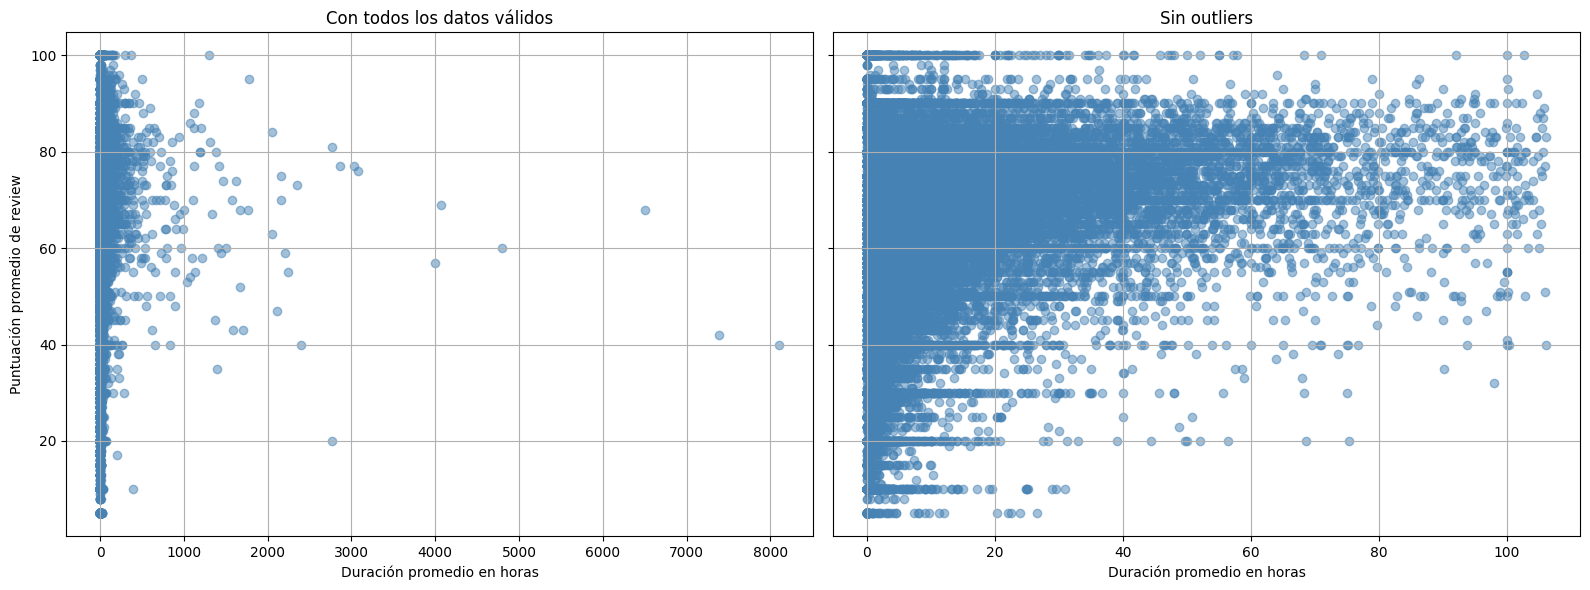

In [17]:
# Función para remover outliers usando IQR (con Q3 en el percentil 95)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Filtrar filas válidas y juegos con al menos una review
df_filtered = df[['game_game_name', 'game_comp_all_avg', 'game_review_score', 'game_count_review']].dropna().copy()
df_filtered = df_filtered[df_filtered['game_count_review'] > 0]
df_filtered['game_comp_all_avg_hrs'] = df_filtered['game_comp_all_avg'] / 3600

# Remover outliers
df_no_outliers = remove_outliers_iqr(df_filtered, 'game_comp_all_avg_hrs')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'game_review_score')

# Crear subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico 1: Todos los datos válidos
ax1.scatter(df_filtered['game_comp_all_avg_hrs'], df_filtered['game_review_score'], alpha=0.5, color='steelblue')
ax1.set_title('Con todos los datos válidos')
ax1.set_xlabel('Duración promedio en horas')
ax1.set_ylabel('Puntuación promedio de review')
ax1.grid(True)

# Gráfico 2: Sin outliers
ax2.scatter(df_no_outliers['game_comp_all_avg_hrs'], df_no_outliers['game_review_score'], alpha=0.5, color='steelblue')
ax2.set_title('Sin outliers')
ax2.set_xlabel('Duración promedio en horas')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [18]:
import pandas as pd


# Filtrar solo los juegos con puntaje de reseñas válido (> 0)
df_valid = df[df['game_review_score'] > 0]

# Seleccionar columnas relevantes
cols = ['game_review_score', 'review_review_count', 'game_comp_main_avg']
df_corr = df_valid[cols]

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

print("Matriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
                     game_review_score  review_review_count  \
game_review_score             1.000000             0.147345   
review_review_count           0.147345             1.000000   
game_comp_main_avg            0.089745             0.069302   

                     game_comp_main_avg  
game_review_score              0.089745  
review_review_count            0.069302  
game_comp_main_avg             1.000000  


In [19]:
import pandas as pd

# Selección de columnas más relevantes
reduced_columns = [
    'game_game_name',
    'game_profile_genre',
    'game_review_score',
    'review_review_count',
    'game_count_replay',
    'game_count_retired',
    'game_count_comp',
    'game_comp_all_avg',
    'game_invested_mp_avg'
]

# Filtrar y limpiar
df_reduced = df[reduced_columns].dropna().copy()

# Convertir atributos de tiempo de segundos a horas
time_columns = ['game_comp_all_avg', 'game_invested_mp_avg']
df_reduced[time_columns] = df_reduced[time_columns] / 3600

# Estadísticas resumen
summary_stats = df_reduced.describe().loc[['mean', '50%', 'std', 'min', 'max']]
summary_stats.rename(index={'50%': 'median'}, inplace=True)
summary_stats = summary_stats.T

# Mostrar resultados
print("\n📈 Estadísticas descriptivas (tiempos en horas):\n", summary_stats)

df_reduced.to_csv('df_reduced.csv', index=False)



📈 Estadísticas descriptivas (tiempos en horas):
                            mean   median         std  min           max
game_review_score     38.924923  50.0000   33.237649  0.0    100.000000
review_review_count   31.259114   1.0000  196.084627  0.0   7439.000000
game_count_replay      3.653113   0.0000   31.617249  0.0   2165.000000
game_count_retired    19.680531   1.0000  104.660610  0.0   5227.000000
game_count_comp       97.816867   3.0000  673.052352  0.0  36371.000000
game_comp_all_avg      9.778211   1.0275   80.340963  0.0   8105.083333
game_invested_mp_avg   2.696709   0.0000   59.000743  0.0  10000.000000
